# Plotting styles in matador

This notebook shows how to alter plotting styles in matador. Typically, these results would be achieved by editing the `default_style` field in your `.matadorrc` file. Finer grained control can be obtained using the API (see section on patching styles). Any function that is decorated with `@plotting_function` will have these styles applied.

In [1]:
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt

In [2]:
from matador.plotting import plot_2d_hull
from matador.plotting import plot_spectral
from matador.hull import QueryConvexHull
from matador.scrapers import res2dict

In [3]:
cursor, failures = res2dict(glob.glob("hull_data/*.res"))
if cursor is None:
    raise RuntimeError("Wrong directory requested, no files found...")
    
hull = QueryConvexHull(
    cursor=cursor, 
    species="KP", 
    no_plot=True
)

Successfully scraped 295 out of 295 files.
7 structures found within 0.0 eV of the hull, including chemical potentials.
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                Source                 !?!  Pressure  Cell volume      Hull dist.      Space group      Formula      # fu   Prov.  
                                             (GPa)      (Å³/fu)        (meV/atom)    
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
* K-Na-Collo                                    0.02         73.3           0.0           Im-3m            K          1     SWAPS  
* KP-NaP-CollCode56530                         -0.00        267.4           0.0           C2/m           K₅P₄         1     SWAPS  
* KP-GA-scno1g-3x2                              0.05         57.4           0.0            P1             KP          8       GA   
* 

## Using different built-in styles

/home/mevans/src/matador/matador/plotting/spectral_plotting.py:1061: UserWarning: Warning: converting a masked element to nan.
  flat_zorders = np.asarray(flat_zorders)
/home/mevans/src/matador/matador/plotting/spectral_plotting.py:1064: UserWarning: Warning: converting a masked element to nan.
  flat_sizes = np.asarray(flat_sizes)[np.argsort(flat_zorders)]


Unable to create spglib structure from input data: skipping path labels: Unable to use doc2spg, one of ('lattice_cart', 'positions_frac', 'atom_types') was missing..


/home/mevans/src/matador/matador/plotting/spectral_plotting.py:329: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Displaying plot...


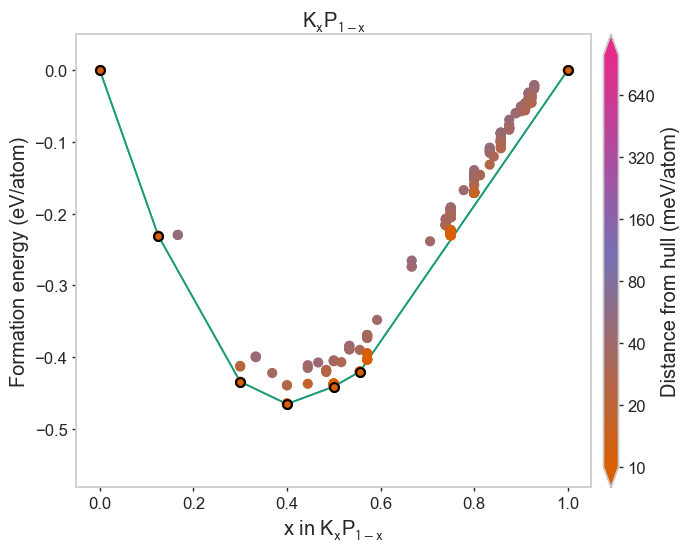

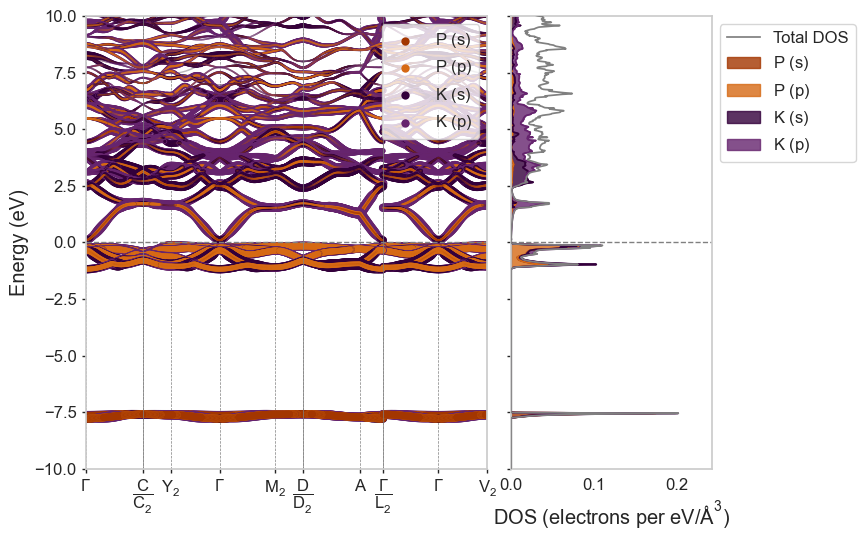

/home/mevans/src/matador/matador/plotting/spectral_plotting.py:1061: UserWarning: Warning: converting a masked element to nan.
  flat_zorders = np.asarray(flat_zorders)
/home/mevans/src/matador/matador/plotting/spectral_plotting.py:1064: UserWarning: Warning: converting a masked element to nan.
  flat_sizes = np.asarray(flat_sizes)[np.argsort(flat_zorders)]


Unable to create spglib structure from input data: skipping path labels: Unable to use doc2spg, one of ('lattice_cart', 'positions_frac', 'atom_types') was missing..
Displaying plot...


/home/mevans/src/matador/matador/plotting/spectral_plotting.py:329: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


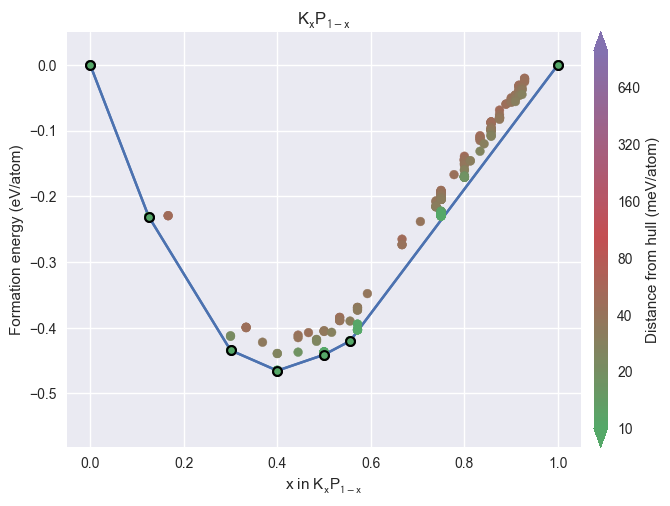

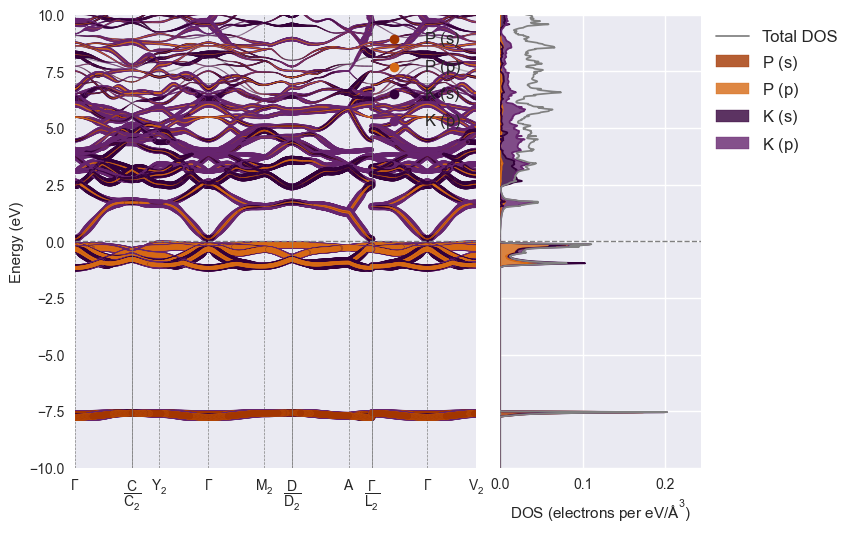

/home/mevans/src/matador/matador/plotting/spectral_plotting.py:1061: UserWarning: Warning: converting a masked element to nan.
  flat_zorders = np.asarray(flat_zorders)
/home/mevans/src/matador/matador/plotting/spectral_plotting.py:1064: UserWarning: Warning: converting a masked element to nan.
  flat_sizes = np.asarray(flat_sizes)[np.argsort(flat_zorders)]


Unable to create spglib structure from input data: skipping path labels: Unable to use doc2spg, one of ('lattice_cart', 'positions_frac', 'atom_types') was missing..


/home/mevans/src/matador/matador/plotting/spectral_plotting.py:329: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Displaying plot...


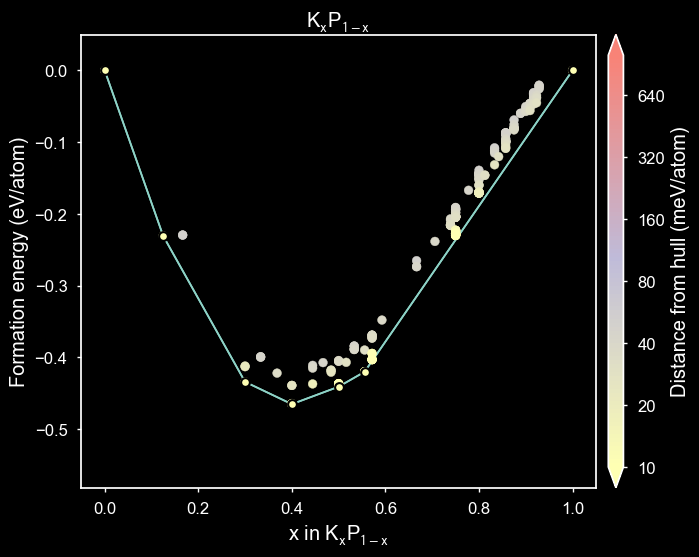

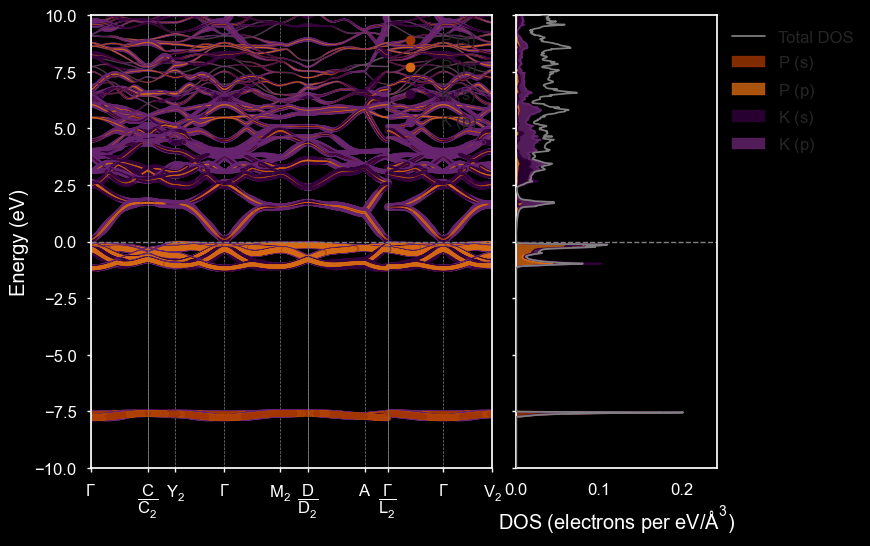

/home/mevans/src/matador/matador/plotting/spectral_plotting.py:1061: UserWarning: Warning: converting a masked element to nan.
  flat_zorders = np.asarray(flat_zorders)
/home/mevans/src/matador/matador/plotting/spectral_plotting.py:1064: UserWarning: Warning: converting a masked element to nan.
  flat_sizes = np.asarray(flat_sizes)[np.argsort(flat_zorders)]


Unable to create spglib structure from input data: skipping path labels: Unable to use doc2spg, one of ('lattice_cart', 'positions_frac', 'atom_types') was missing..
Displaying plot...


/home/mevans/src/matador/matador/plotting/spectral_plotting.py:329: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


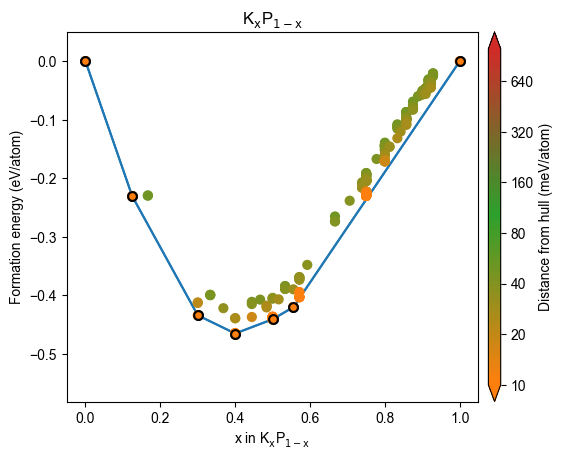

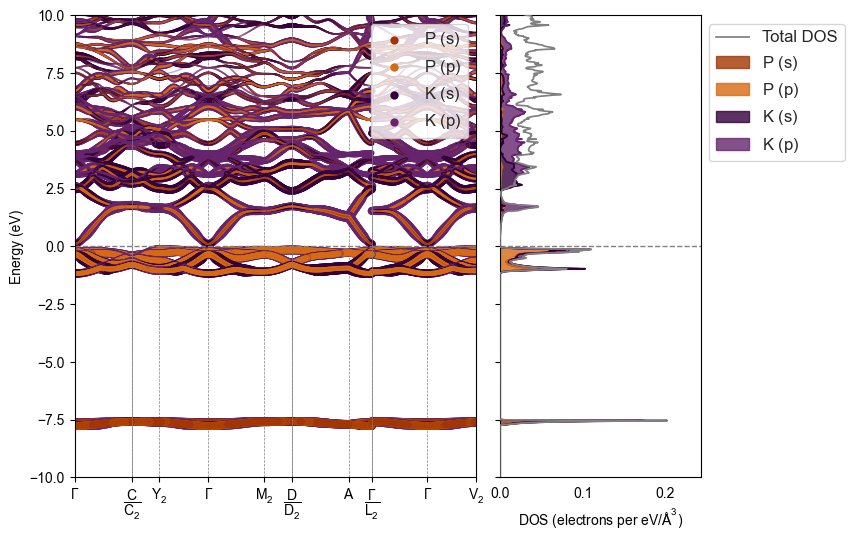

In [4]:
styles = ['matador', 'seaborn', 'dark_background', 'default']
for style in styles:
    # reset to default to avoid stacking plot styles
    if hasattr(hull, 'colours'):
        del hull.colours
    plot_2d_hull(hull, style=style)
    plot_spectral(
        "dispersion_data/K3P-OQMD_4786-CollCode25550",
        style=style
    )

## Patching styles on demand

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Archivo Narrow
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Archivo Narrow


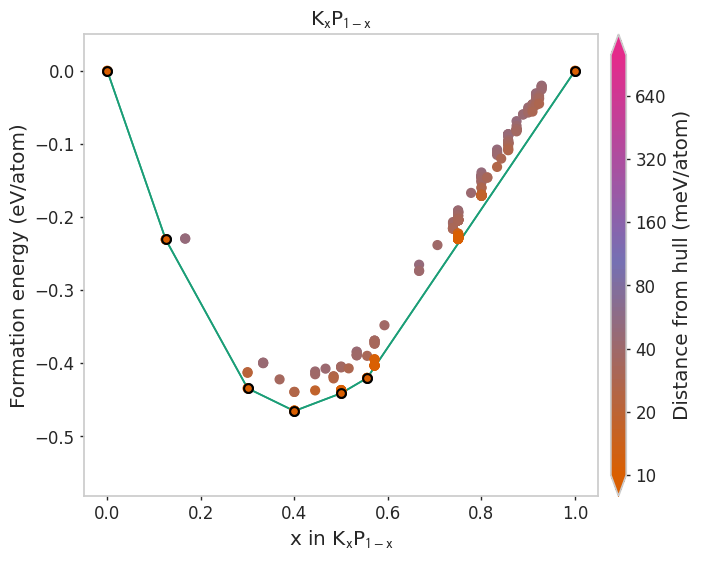

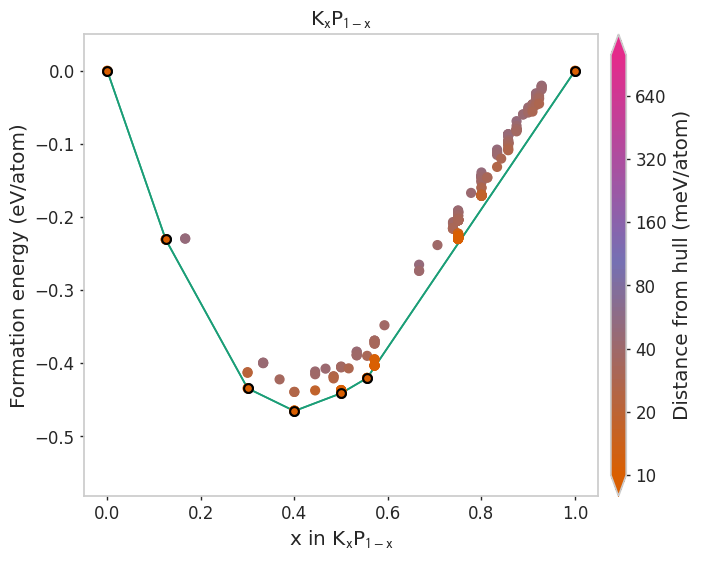

In [5]:
fonts = ['Arial Black', 'Archivo Narrow']
for font in fonts:
    # reset to default to avoid stacking plot styles
    if hasattr(hull, 'colours'):
        del hull.colours
    plot_2d_hull(hull, style=['matador', {'font.sans-serif': [font]}])